In [3]:
import pandas as pd

# Step 1: Load the dataset
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'  # your local path
df = pd.read_csv(file_path)

# Step 2: Ensure Material is string type (important!)
df['Material'] = df['Material'].astype(str)

# Step 3: Filter for Material 511209
material_511209 = df[df['Material'].str.strip() == '511209']

# Step 4: Reshape to Time Series (Month → Demand)
# Drop unnecessary columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_511209_ts = material_511209.drop(columns=drop_cols)

# Now transpose (flip rows and columns)
material_511209_ts = material_511209_ts.transpose()

# Step 5: Clean the index (remove "Actual" words and extra spaces)
material_511209_ts.index = material_511209_ts.index.str.replace('Actual', '')
material_511209_ts.index = material_511209_ts.index.str.strip()

# Step 6: Reset index and rename columns
material_511209_ts = material_511209_ts.reset_index()
material_511209_ts.columns = ['Month', 'Demand']

# Step 7: Convert 'Month' into datetime
# Step 7: Convert 'Month' into datetime and set to Month-End
material_511209_ts['Month'] = pd.to_datetime(material_511209_ts['Month'], format='%b %y')
material_511209_ts['Month'] = material_511209_ts['Month'] + pd.offsets.MonthEnd(0)


# Final time series ready
print(material_511209_ts)


        Month  Demand
0  2021-04-30   12906
1  2021-05-31    9342
2  2021-06-30   39993
3  2021-07-31   18852
4  2021-08-31   76164
5  2021-09-30   30920
6  2021-10-31   28410
7  2021-11-30   28902
8  2021-12-31   33235
9  2022-01-31   30271
10 2022-02-28   20542
11 2022-03-31   36801
12 2022-04-30   46603
13 2022-05-31   35478
14 2022-06-30   37219
15 2022-07-31   24085
16 2022-08-31   37546
17 2022-09-30   33075
18 2022-10-31   22134
19 2022-11-30   47804
20 2022-12-31   29945
21 2023-01-31   25340
22 2023-02-28   31691
23 2023-03-31   23082
24 2023-04-30   22163
25 2023-05-31   47905
26 2023-06-30   33803
27 2023-07-31   28642
28 2023-08-31   27223
29 2023-09-30   42930
30 2023-10-31   17391
31 2023-11-30   26758


Missing values:
 Month     0
Demand    0
dtype: int64

Summary Statistics:
 count       32.000000
mean     31473.593750
std      12454.715824
min       9342.000000
25%      23834.250000
50%      30108.000000
75%      36905.500000
max      76164.000000
Name: Demand, dtype: float64


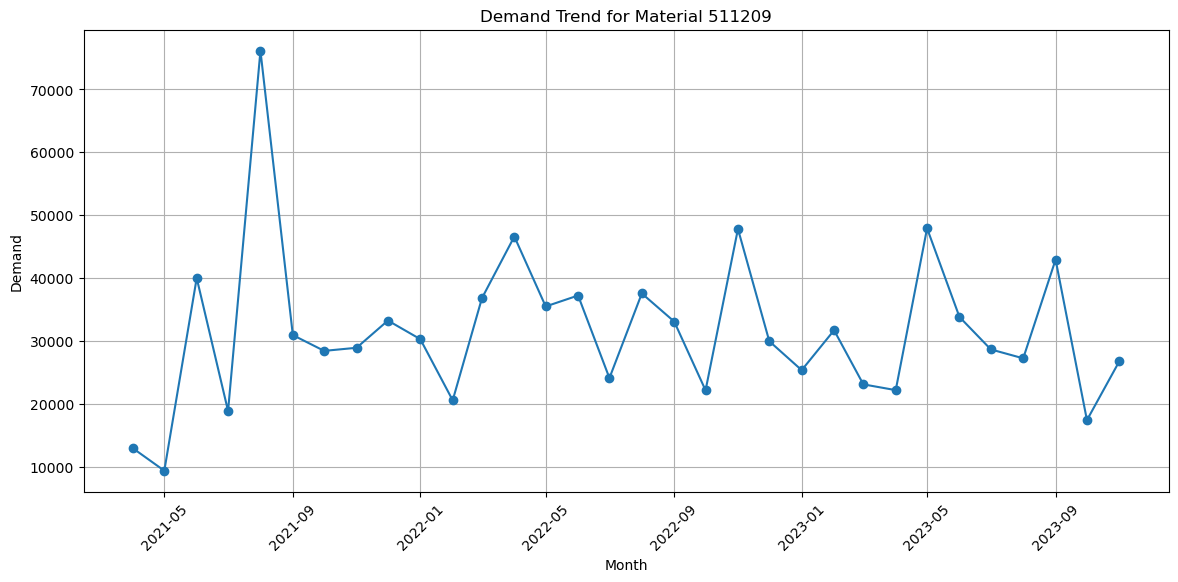

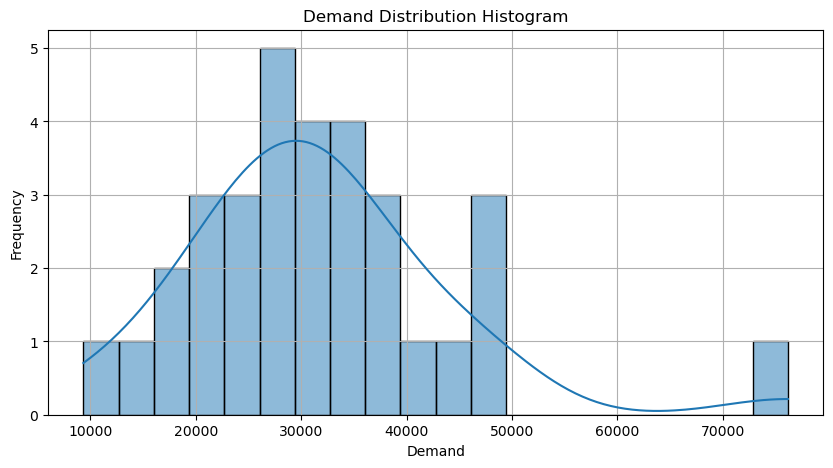

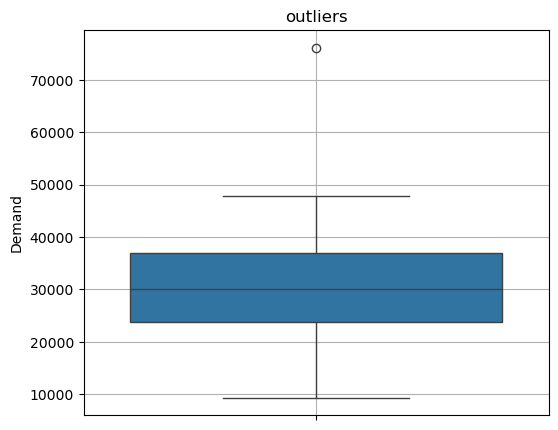

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare Material 511209
df['Material'] = df['Material'].astype(str)  # Ensure 'Material' is string
material_511209 = df[df['Material'].str.strip() == '511209']

# Drop unnecessary columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_511209_ts = material_511209.drop(columns=drop_cols).transpose()

# Clean the index and format
material_511209_ts.index = material_511209_ts.index.str.replace('Actual', '')
material_511209_ts.index = material_511209_ts.index.str.strip()

material_511209_ts = material_511209_ts.reset_index()
material_511209_ts.columns = ['Month', 'Demand']

# Convert Month to datetime and Demand to numeric
material_511209_ts['Month'] = pd.to_datetime(material_511209_ts['Month'], format='%b %y')
material_511209_ts['Demand'] = material_511209_ts['Demand'].astype(float)

# Step 2: Check for missing values
print("Missing values:\n", material_511209_ts.isnull().sum())

# Step 3: Basic statistics
print("\nSummary Statistics:\n", material_511209_ts['Demand'].describe())

# Step 4: Plot the demand trend over time
plt.figure(figsize=(14, 6))
plt.plot(material_511209_ts['Month'], material_511209_ts['Demand'], marker='o')
plt.title('Demand Trend for Material 511209')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Step 5: Plot histogram of Demand
plt.figure(figsize=(10, 5))
sns.histplot(material_511209_ts['Demand'], bins=20, kde=True)
plt.title('Demand Distribution Histogram')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 6: Plot boxplot to detect outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=material_511209_ts['Demand'])
plt.title('outliers')
plt.grid(True)
plt.show()


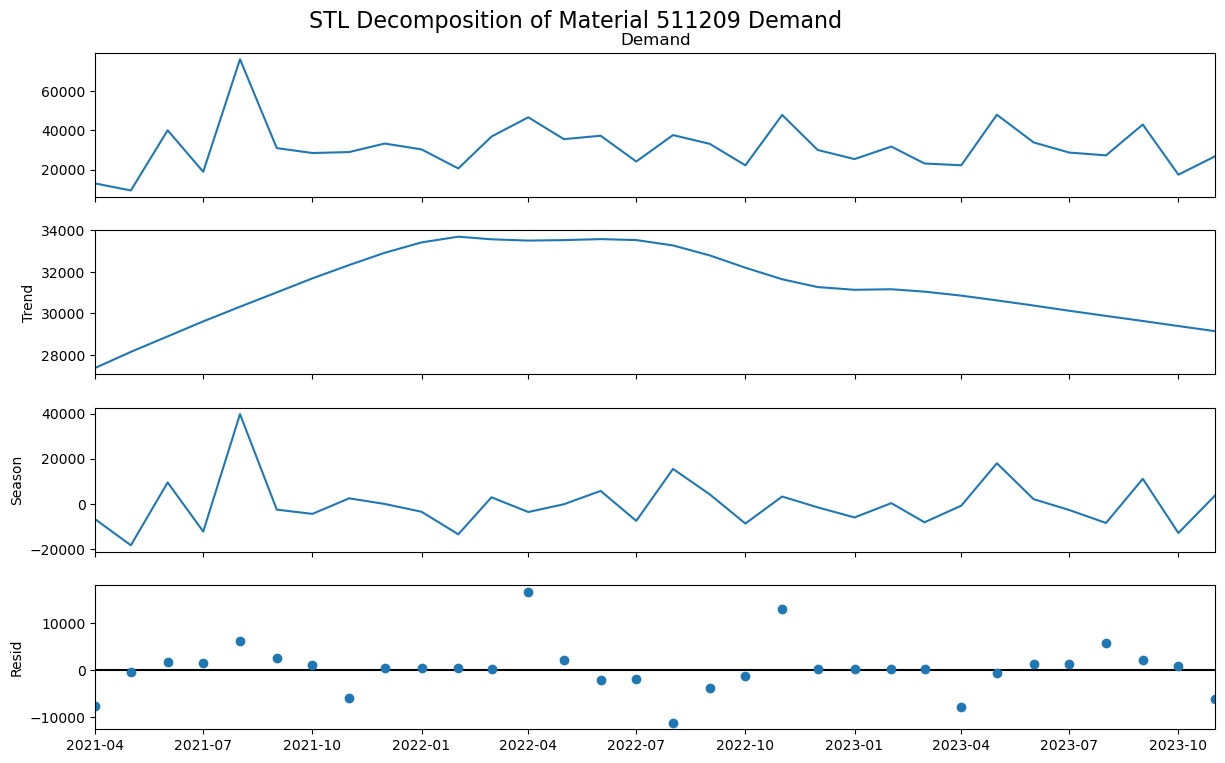

In [5]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Step 1: Set 'Month' as index
material_511209_ts_stl = material_511209_ts.set_index('Month')

# Step 2: Apply STL decomposition
stl = STL(material_511209_ts_stl['Demand'], seasonal=13)  # 13 because monthly data (12-13 months captures annual seasonality)
result = stl.fit()

# Step 3: Plot the decomposition
fig = result.plot()
fig.set_size_inches(14, 8)
fig.suptitle('STL Decomposition of Material 511209 Demand', fontsize=16)
plt.show()


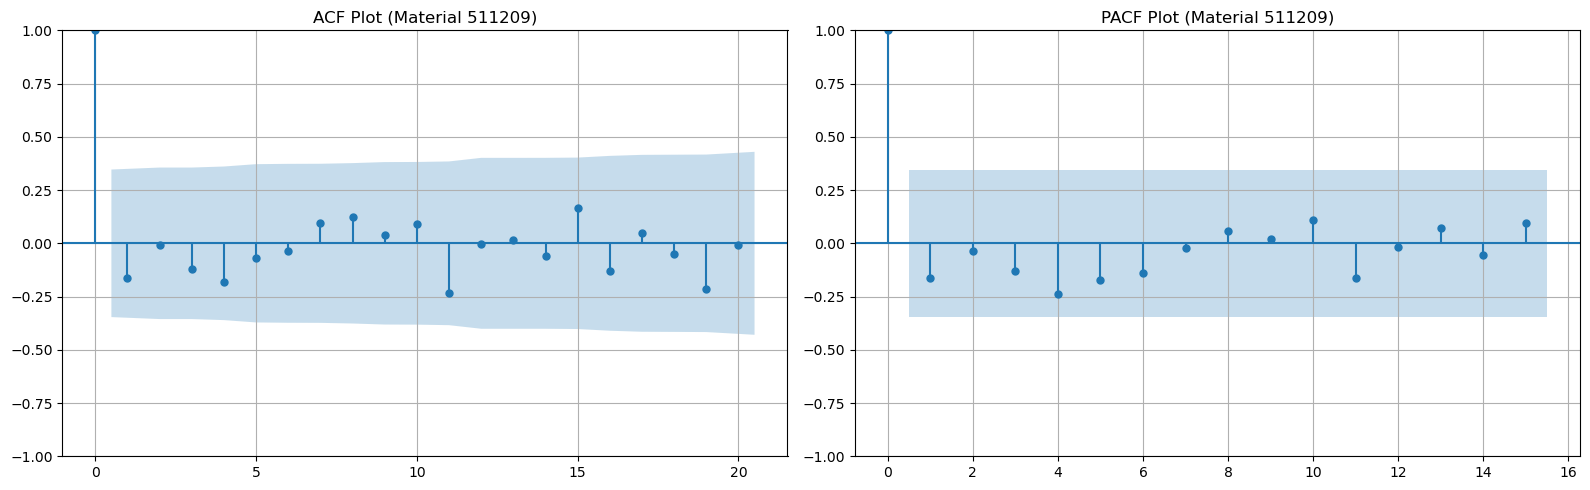

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Only take Demand column for plotting
demand_series = material_511209_ts['Demand']  # 👈 Focus on just the numeric part

# ACF and PACF Plots for original series
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF plot
plot_acf(demand_series, lags=20, ax=axes[0], title='ACF Plot (Material 511209)')
axes[0].grid(True)

# PACF plot
plot_pacf(demand_series, lags=15, ax=axes[1], method='ywm', title='PACF Plot (Material 511209)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# Set 'Month' as index (if not already)
material_511209_ts_stl = material_511209_ts.set_index('Month')

# Perform ADF Test
adf_result = adfuller(material_511209_ts_stl['Demand'])

# Print ADF results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value}')
    
# Conclusion
if adf_result[1] < 0.05:
    print("\nThe series is Stationary (reject H₀).")
else:
    print("\n The series is Non-Stationary (fail to reject H₀).")


ADF Statistic: -5.044946260770663
p-value: 1.806935063229582e-05
Critical Values:
    1%: -3.6699197407407405
    5%: -2.9640707407407407
    10%: -2.621171111111111

The series is Stationary (reject H₀).


In [8]:
# Assume material_511209_ts_stl is your processed dataframe with 'Month' as index
data = material_511209_ts.set_index('Month')

# Step 1: Define training and testing sets
train = data.iloc[:-4]  # all except last 4 months
test = data.iloc[-4:]   # last 4 months

# Print shapes
print("Training Set Shape:", train.shape)
print("Testing Set Shape:", test.shape)

# Show the last few rows to verify
print("\nTraining Data (last few rows):")
print(train.tail())

print("\nTesting Data:")
print(test)


Training Set Shape: (28, 1)
Testing Set Shape: (4, 1)

Training Data (last few rows):
             Demand
Month              
2023-03-01  23082.0
2023-04-01  22163.0
2023-05-01  47905.0
2023-06-01  33803.0
2023-07-01  28642.0

Testing Data:
             Demand
Month              
2023-08-01  27223.0
2023-09-01  42930.0
2023-10-01  17391.0
2023-11-01  26758.0


In [9]:
# When preparing the data
material_511209_ts['Month'] = pd.to_datetime(material_511209_ts['Month'], format='%b %y')
material_511209_ts = material_511209_ts.set_index('Month')
material_511209_ts.index.freq = 'MS'  # manually setting Monthly Start

# Now continue splitting
data = material_511209_ts
train = data.iloc[:-4]
test = data.iloc[-4:]


In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit Simple Exponential Smoothing (SES) model on training data
ses_model = SimpleExpSmoothing(train['Demand']).fit()

# Step 2: Predict for the test period (next 4 months)
ses_pred_test = ses_model.forecast(steps=4)

# Step 3: Calculate MAPE on test data
mape_test = mean_absolute_percentage_error(test['Demand'], ses_pred_test) * 100

print(f"MAPE on Test Set SES: {mape_test:.2f}%")

# Step 4: Forecast for next 3 months (Dec 2023, Jan 2024, Feb 2024)
ses_model_full = SimpleExpSmoothing(data['Demand']).fit()
ses_forecast_next3 = ses_model_full.forecast(steps=3)

print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(ses_forecast_next3)


MAPE on Test Set SES: 36.40%

Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    29105.467499
2024-01-01    29105.467499
2024-02-01    29105.467499
Freq: MS, dtype: float64


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Differencing (if needed) — assuming non-stationary from ADF
train_diff = train['Demand'].diff().dropna()

# Step 2: Fit ARIMA model (p,d,q)
# Assuming initial guess p=1, d=1 (because differencing), q=1 (basic)
model = ARIMA(train['Demand'], order=(1,1,1))
model_fit = model.fit()

# Step 3: Predict for the next 4 months (test set)
forecast_test = model_fit.forecast(steps=4)

# Step 4: Calculate MAPE
mape_arima = mean_absolute_percentage_error(test['Demand'], forecast_test) * 100
print(f"MAPE on Test Set (ARIMA): {mape_arima:.2f}%")

# Step 5: Retrain on full data
final_model = ARIMA(data['Demand'], order=(1,1,1))
final_model_fit = final_model.fit()

# Step 6: Forecast next 3 months (Dec 2023 - Feb 2024)
forecast_next3 = final_model_fit.forecast(steps=3)

print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3)


MAPE on Test Set (ARIMA): 33.31%

Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    30604.458842
2024-01-01    30540.753147
2024-02-01    30541.808252
Freq: MS, Name: predicted_mean, dtype: float64


In [18]:
print(final_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -340.296
Date:                Wed, 30 Apr 2025   AIC                            686.593
Time:                        11:51:12   BIC                            690.895
Sample:                    04-01-2021   HQIC                           687.995
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0166      0.414     -0.040      0.968      -0.827       0.794
ma.L1         -1.0000      0.129     -7.762      0.000      -1.253      -0.747
sigma2       1.83e+08   7.04e-10    2.6e+17      0.0

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit SARIMA model
# Start with basic order (1,1,1)(1,1,1,12) for monthly data
sarima_model = SARIMAX(train['Demand'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Step 2: Predict for the test period
sarima_pred_test = sarima_fit.forecast(steps=4)

# Step 3: Calculate MAPE
mape_sarima = mean_absolute_percentage_error(test['Demand'], sarima_pred_test) * 100
print(f"MAPE on Test Set (SARIMA): {mape_sarima:.2f}%")

# Step 4: Retrain SARIMA on full data
sarima_final_model = SARIMAX(data['Demand'],
                             order=(1,1,1),
                             seasonal_order=(1,1,1,12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
sarima_final_fit = sarima_final_model.fit()

# Step 5: Forecast next 3 months
sarima_forecast_next3 = sarima_final_fit.forecast(steps=3)

print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(sarima_forecast_next3)


MAPE on Test Set (SARIMA): 47.48%


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    27907.300928
2024-01-01    24841.187355
2024-02-01    27980.521217
Freq: MS, Name: predicted_mean, dtype: float64


In [13]:
print(sarima_final_fit .summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Demand   No. Observations:                   32
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -53.765
Date:                            Wed, 30 Apr 2025   AIC                            117.529
Time:                                    11:42:54   BIC                            115.576
Sample:                                04-01-2021   HQIC                           112.288
                                     - 11-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1859     10.344     -0.018      0.986     -20.460      20.088
ma.L1         -0.6893      6.597   

In [14]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Prepare data for Prophet
train_prophet = train.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})
test_prophet = test.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})
full_prophet = data.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})

# Step 2: Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Step 3: Create future dataframe for test period (4 months)
future_test = prophet_model.make_future_dataframe(periods=4, freq='MS')
forecast_test = prophet_model.predict(future_test)

# Get only the forecasted part (last 4 months)
forecast_test_part = forecast_test.iloc[-4:]['yhat']

# Step 4: Calculate MAPE
mape_prophet = mean_absolute_percentage_error(test_prophet['y'], forecast_test_part) * 100
print(f"MAPE on Test Set (Prophet): {mape_prophet:.2f}%")

# Step 5: Retrain on full data
prophet_full_model = Prophet()
prophet_full_model.fit(full_prophet)

# Step 6: Forecast next 3 months
future_full = prophet_full_model.make_future_dataframe(periods=3, freq='MS')
forecast_next3 = prophet_full_model.predict(future_full)
forecast_next3_part = forecast_next3.iloc[-3:]['yhat']

print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3_part)


11:42:55 - cmdstanpy - INFO - Chain [1] start processing
11:42:56 - cmdstanpy - INFO - Chain [1] done processing
11:42:56 - cmdstanpy - INFO - Chain [1] start processing


MAPE on Test Set (Prophet): 64.04%


11:42:57 - cmdstanpy - INFO - Chain [1] done processing



Forecast for next 3 months (Dec 2023 - Feb 2024):
32    36732.062648
33    23348.277204
34    36108.448084
Name: yhat, dtype: float64


In [15]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Step 1: Create lag features
def create_lag_features(df, n_lags):
    df = df.copy()
    for lag in range(1, n_lags+1):
        df[f'lag_{lag}'] = df['Demand'].shift(lag)
    df.dropna(inplace=True)
    return df

# Create lag features
n_lags = 12  # since monthly, past 12 months
data_lagged = create_lag_features(data, n_lags)

# Split train and test
train_lagged = data_lagged.iloc[:-4]
test_lagged = data_lagged.iloc[-4:]

X_train = train_lagged.drop('Demand', axis=1)
y_train = train_lagged['Demand']
X_test = test_lagged.drop('Demand', axis=1)
y_test = test_lagged['Demand']

# Step 2: Fit XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Step 3: Predict on test
y_pred_test = xgb_model.predict(X_test)

# Step 4: Calculate MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(f"MAPE on Test Set (XGBoost): {mape_xgb:.2f}%")

# Step 5: Retrain on full data
X_full = data_lagged.drop('Demand', axis=1)
y_full = data_lagged['Demand']
xgb_final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_final_model.fit(X_full, y_full)

# Step 6: Forecast next 3 months manually
future_preds = []
last_row = X_full.iloc[-1].values.reshape(1, -1)

for i in range(3):
    pred = xgb_final_model.predict(last_row)[0]
    future_preds.append(pred)
    
    # Update last_row by shifting and adding the new prediction
    last_row = np.roll(last_row, -1)
    last_row[0, -1] = pred  # Set latest lag

# Step 7: Output future forecast
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')

forecast_next3 = pd.Series(future_preds, index=future_dates)

print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3)


MAPE on Test Set (XGBoost): 42.58%

Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    26758.001953
2024-01-01    17391.003906
2024-02-01    42945.503906
Freq: MS, dtype: float32


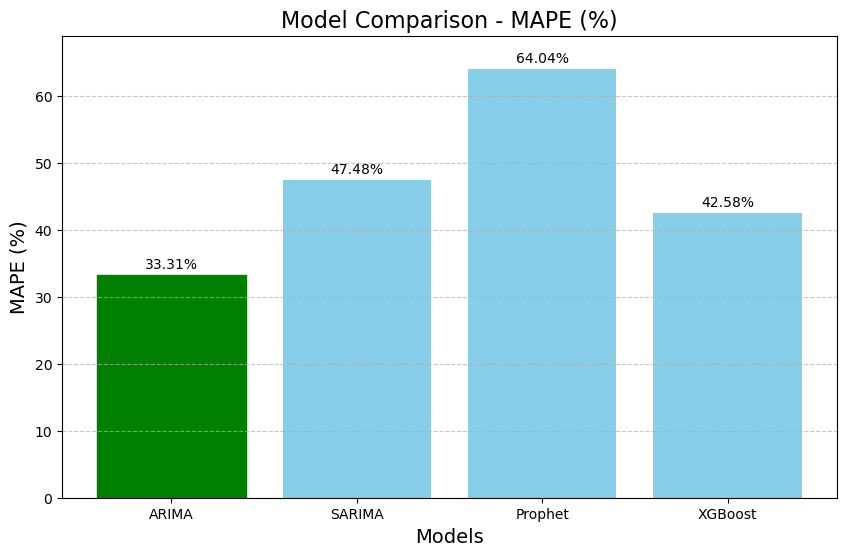

In [16]:
import matplotlib.pyplot as plt

# Step 1: Store the MAPE values
model_mape = {
    
     'ARIMA': mape_arima,
    'SARIMA': mape_sarima,
    'Prophet': mape_prophet,
    'XGBoost': mape_xgb
}

# Step 2: Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_mape.keys(), model_mape.values(), color='skyblue')

# Step 3: Highlight best model (lowest MAPE) in green
best_model_idx = list(model_mape.values()).index(min(model_mape.values()))
bars[best_model_idx].set_color('green')

# Step 4: Add labels and title
plt.title('Model Comparison - MAPE (%)', fontsize=16)
plt.ylabel('MAPE (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, max(model_mape.values()) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add MAPE values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()



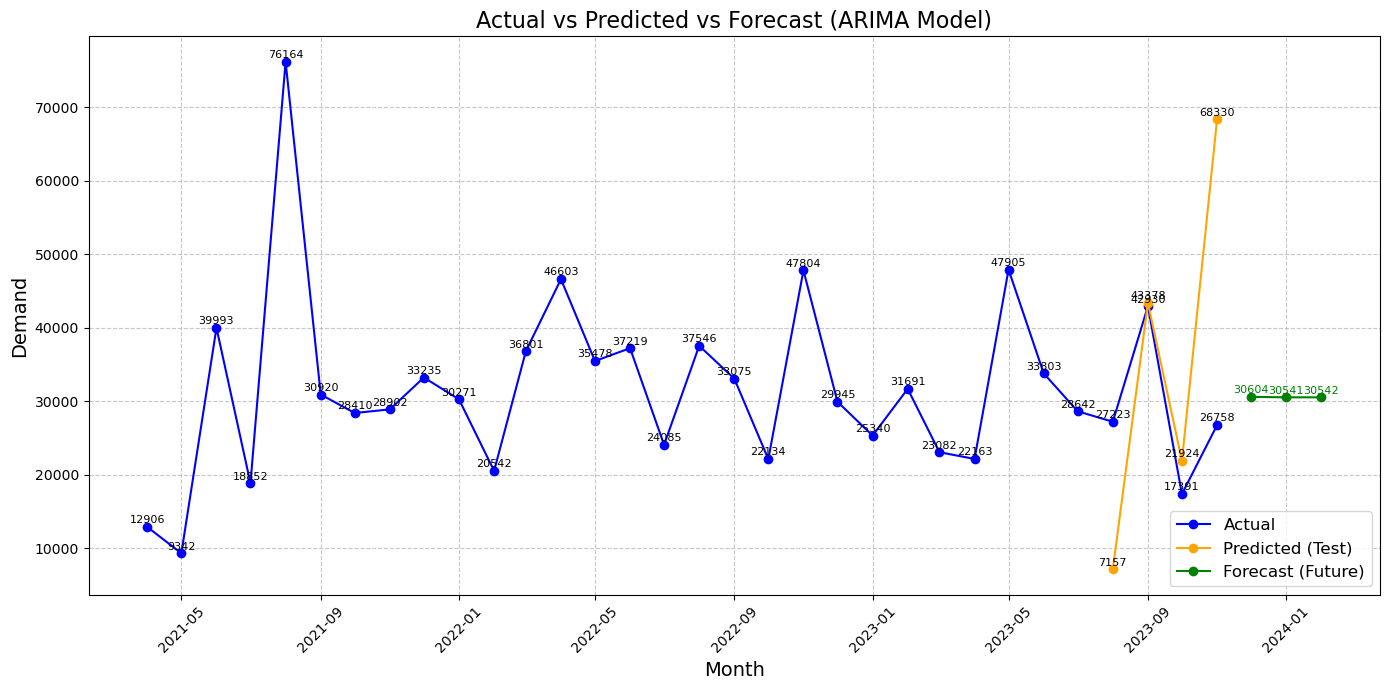


🔵 Best Model: ARIMA
✅ MAPE on Test Set: 33.31%

📈 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
2023-12-01    30604.46
2024-01-01    30540.75
2024-02-01    30541.81
Freq: MS, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Collect data (for ARIMA)
actual = data.copy()

# Ensure forecast_test contains only the last 4 elements to match test.index
forecast_test_trimmed = forecast_test.iloc[-len(test.index):]

# Extract the 'yhat' column from forecast_test_trimmed to ensure it is a Series
forecast_test_trimmed = forecast_test_trimmed['yhat']

# Ensure forecast_test_trimmed is a pandas Series and matches the length of test.index
if len(forecast_test_trimmed) != len(test.index):
    raise ValueError(f"Length mismatch: forecast_test_trimmed has {len(forecast_test_trimmed)} elements, but test.index has {len(test.index)} elements.")

# Predicted Test
predicted_test = pd.Series(forecast_test_trimmed.values, index=test.index)

# Final Forecast (use your provided correct forecast values)
forecast_index = pd.date_range(start='2023-12-01', periods=3, freq='MS')
forecast_future = pd.Series([30604.458842, 30540.753147, 30541.808252], index=forecast_index)

# Step 2: Plot
plt.figure(figsize=(14, 7))

# Plot actual
plt.plot(actual.index, actual['Demand'], label='Actual', color='blue', marker='o')

# Plot predicted
plt.plot(predicted_test.index, predicted_test.values, label='Predicted (Test)', color='orange', marker='o')

# Plot forecast
plt.plot(forecast_future.index, forecast_future.values, label='Forecast (Future)', color='green', marker='o')

# Step 3: Add labels on points
# Actual
for x, y in zip(actual.index, actual['Demand']):
    plt.text(x, y+500, f'{y:.0f}', ha='center', fontsize=8)

# Predicted
for x, y in zip(predicted_test.index, predicted_test.values):
    plt.text(x, y+500, f'{y:.0f}', ha='center', fontsize=8)

# Forecast
for x, y in zip(forecast_future.index, forecast_future.values):
    plt.text(x, y+500, f'{y:.0f}', ha='center', fontsize=8, color='green')

# Step 4: Titles and labels
plt.title('Actual vs Predicted vs Forecast (ARIMA Model)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Step 5: Print Best Model MAPE and Forecast values
print(f"\n🔵 Best Model: ARIMA")
print(f"✅ MAPE on Test Set: {mape_arima:.2f}%\n")
print("📈 Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_future.round(2))

